In [1]:
# Chargement des librairies Pandas, Network et folium

%matplotlib inline

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv
import folium


In [2]:
# chargement du fichier transport-nodes.csv

import pandas as pd
df_nodes = pd.read_csv("transport-nodes.csv")

df_nodes

,id,latitude,longitude,population
0,Amsterdam,52.379189,4.899431,821752
1,Utrecht,52.092876,5.104480,334176
2,Den Haag,52.078663,4.288788,514861
3,Immingham,53.612390,-0.222190,9642
4,Doncaster,53.522850,-1.131160,302400
5,Hoek van Holland,51.977500,4.133330,9382
6,Felixstowe,51.963750,1.351100,23689
7,Ipswich,52.059170,1.155450,133384
8,Colchester,51.889210,0.904210,104390
9,London,51.509865,-0.118092,8787892


In [3]:
#chargement du fichier transport-relationships.csv

import pandas as pd
df_relation = pd.read_csv("transport-relationships.csv")

df_relation

,src,dst,relationship,cost
0,Amsterdam,Utrecht,EROAD,46
1,Amsterdam,Den Haag,EROAD,59
2,Den Haag,Rotterdam,EROAD,26
3,Amsterdam,Immingham,EROAD,369
4,Immingham,Doncaster,EROAD,74
5,Doncaster,London,EROAD,277
6,Hoek van Holland,Den Haag,EROAD,27
7,Felixstowe,Hoek van Holland,EROAD,207
8,Ipswich,Felixstowe,EROAD,22
9,Colchester,Ipswich,EROAD,32


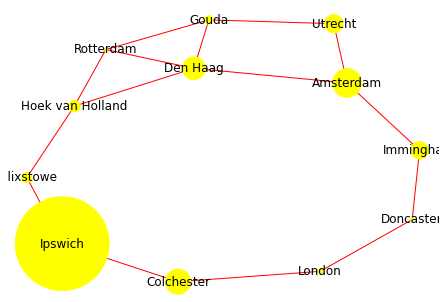

In [6]:
# Récupere la taille de chaque population    
i = 0
population = []
while i < 12:
    population.append((df_nodes['population'][i])/1000)
    i = i + 1
    
# Construisez le graphe et le visualiser avec la fonction from_pandas_dataframe de networkx

graph = df_relation[['src','dst']]

ng = nx.from_pandas_edgelist(graph,'src','dst')

nx.draw(ng, with_labels=True,node_size=population,node_color='yellow',edge_color='red')
plt.show()

In [9]:
# Ajouter des attributs longitude et latitude
G = nx.Graph()
def ajouterAttributs(G,dfnode,nameAttr,Index):
    node=dfnode[[Index,nameAttr]]
    nodes=node.set_index(Index).to_dict('index')
    nx.set_node_attributes(G,nodes)
    
ajouterAttributs(G,df_nodes,'latitude','id')
ajouterAttributs(G,df_nodes,'longitude','id')
ajouterAttributs(G,df_nodes,'population','id')
print(dict(G.nodes.data()))


AttributeError: 'DataFrame' object has no attribute 'nodes'

In [ ]:
#Représentation des noeuds sur une carte avec Folium

# create map
map_airports = folium.Map(location=[48.8566,2.3522], zoom_start=5)

# plot airport locations
for (index, row) in df_nodes.iterrows():
    folium.Marker(location=[row.loc['latitude'], row.loc['longitude']],popup=index,icon=folium.Icon(color='red')).add_to(map_airports)
    
# display map    
map_airports

"""
        for (index, row) in df_nodes.iterrows():
        for neighbor in ng.neighbors(index):
            points.append((([row.loc['longitude']],[row.loc['latitude']]),(ng.nodes[neighbor][row.loc['longitude']],ng.nodes[neighbor][row.loc['latitude']])))
        return points
    
    """

In [ ]:

def construirePointsImage(ng):
    points=[]
    for i in ng.nodes:
        for neighbor in ng.neighbors(i):
            points.append(((ng.nodes[i]['longitude'],ng.nodes[i]['latitude']),(ng.nodes[neighbor]['longitude'],ng.nodes[neighbor]['latitude'])))
    return points

print(construirePointsImage(ng))